<a href="https://colab.research.google.com/github/prncrlnd/Test/blob/main/Different_Activation_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf

def relu(x):
  return tf.nn.relu(x)

def swish(x):
  return x * tf.sigmoid(x)

def mish(x):
  return x * tf.tanh(tf.log(1 + tf.exp(x)))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8175 - loss: 6.6880 - val_accuracy: 0.8763 - val_loss: 0.5956
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8937 - loss: 0.4454 - val_accuracy: 0.9151 - val_loss: 0.4488
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9196 - loss: 0.3197 - val_accuracy: 0.9239 - val_loss: 0.3188
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9318 - loss: 0.2588 - val_accuracy: 0.9286 - val_loss: 0.3272
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9417 - loss: 0.2305 - val_accuracy: 0.9373 - val_loss: 0.2742
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9446 - loss: 0.2179 - val_accuracy: 0.9255 - val_loss: 0.3088
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9472 - loss: 0.2045 - val_accuracy: 0.9351 - val_loss: 0.3089
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9501 - loss: 0.1963 

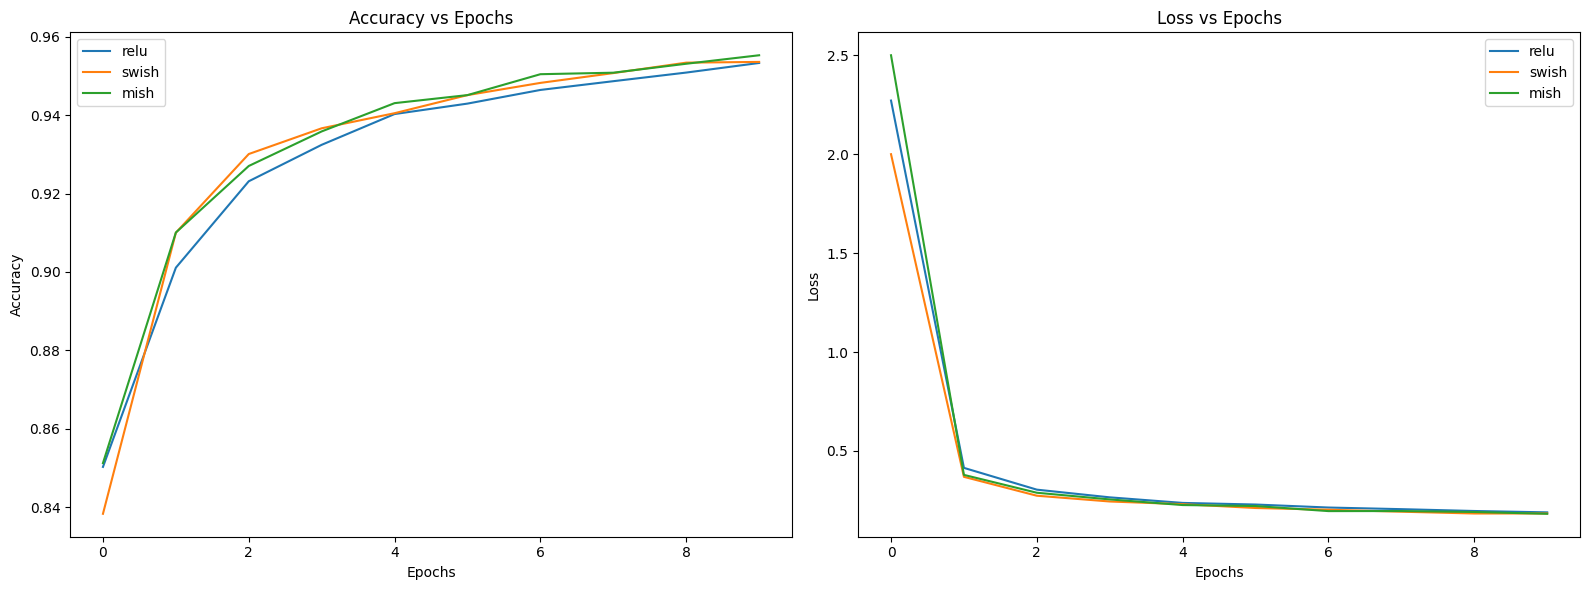

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Create models with different activation functions
models = {
    'relu': Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]),
    'swish': Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='swish'),
        Dense(10, activation='softmax')
    ]),
    'mish': Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='mish'),
        Dense(10, activation='softmax')
    ])
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
    results[name] = history

# Plot training curves
plt.figure(figsize=(16, 6))  # Increase figure size to accommodate two plots

# Accuracy vs Epochs
plt.subplot(1, 2, 1)  # Create first subplot for accuracy
for name, history in results.items():
    plt.plot(history.history['accuracy'], label=name)
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss vs Epochs
plt.subplot(1, 2, 2)  # Create second subplot for loss
for name, history in results.items():
    plt.plot(history.history['loss'], label=name)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()  # Adjust spacing between subplots for better readability
plt.show()